In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import pandas as pd
from scipy.optimize import curve_fit
rg = Generator(PCG64(12345))

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [2]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import cm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set()

In [3]:
from numpy import *
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from importlib import reload
import seaborn as sns
from sklearn import linear_model
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
def cir(r0, gamma, rbar, N, alpha1,  n_scenarios):

    dt = 1/252 #time increment
    alpha = gamma*rbar*dt
    sigmadt = (alpha1*dt)**0.5
    beta = 1 - gamma*dt
    epsilon = np.random.bvnormal(0, 1 ,  size=(N, n_scenarios))
    #each column is a scenario, each row is a period
    rates = np.empty_like(epsilon)

    rates[0] = r0
    
    for i in range(1,N):
            rates[i] = alpha+beta*rates[i-1] + rates[i-1]**0.5*sigmadt*epsilon[i]

    return pd.DataFrame(rates,index=np.arange(0,N))
    #return epsilon

In [79]:
epsilon = np.random.normal(0, 1 ,  size=(250, 1000))

In [80]:
epsilon

array([[ 0.25518465,  0.50753083,  0.60973795, ..., -0.51385598,
         0.80700054,  0.37613485],
       [ 0.34292298, -0.57497565,  0.44835452, ..., -0.70797322,
        -0.43217854,  1.00726033],
       [-0.65237545,  1.89718401, -0.61348865, ..., -0.87049286,
        -0.91525029, -0.33024309],
       ...,
       [-0.40207379, -0.40234709,  0.45191356, ..., -2.08102464,
        -0.84943151,  0.39169633],
       [-0.37121781,  1.61611025, -1.07838597, ...,  0.07680271,
        -0.77186534, -1.13099823],
       [ 0.16267173, -0.81587466,  2.23405406, ..., -0.72897446,
        -0.26143407,  0.70032563]])

In [81]:
def CIR_SimulateExact(r0,A,B,sigma,Deltat,N,NScenarios):
    
 DF = 4*A*B/sigma**2
 C = 2*A/(1-np.exp(-A*Deltat))/sigma**2
 rt = np.zeros((N,NScenarios))
 rt[0,:] = r0
 for i in range(N-1):
     nonc = 2*C*rt[i,:]*np.exp(-A*Deltat)
     rt[i+1,:] = rg.noncentral_chisquare(DF, nonc,size=(1,NScenarios))/(2*C)
 return(pd.DataFrame(rt, index=np.arange(0,N)))

In [82]:
cir_simulation = CIR_SimulateExact(r0=0.5, A=2, B=0.1, sigma=0.2, Deltat=1/252, N=252, NScenarios=1000)

In [83]:
cir_simulation

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.496856,0.500853,0.495710,0.504139,0.489072,0.493088,0.489483,0.507327,0.497403,0.500893,...,0.509064,0.499280,0.491161,0.490701,0.525924,0.495360,0.494475,0.499348,0.503919,0.496978
2,0.496100,0.486342,0.472208,0.508542,0.488588,0.499990,0.484214,0.504779,0.493205,0.494546,...,0.510809,0.496241,0.492040,0.494429,0.507956,0.476963,0.495889,0.503658,0.503824,0.507363
3,0.489841,0.488602,0.468580,0.487766,0.502412,0.502190,0.485538,0.500055,0.497411,0.500017,...,0.505065,0.492917,0.483069,0.503451,0.515945,0.482574,0.499777,0.504532,0.488940,0.506330
4,0.494677,0.479870,0.477699,0.477821,0.490321,0.498055,0.476200,0.514020,0.492665,0.511101,...,0.512139,0.478639,0.464623,0.495574,0.539548,0.482253,0.500858,0.506914,0.484750,0.501757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.131267,0.142250,0.188951,0.139551,0.226812,0.069398,0.267173,0.180703,0.164455,0.157025,...,0.099409,0.077670,0.158068,0.109023,0.234964,0.191599,0.170474,0.149660,0.335790,0.192238
248,0.129610,0.141414,0.176263,0.135242,0.228723,0.066372,0.252913,0.176159,0.168677,0.155457,...,0.094043,0.073855,0.152066,0.115967,0.235456,0.190942,0.176857,0.153720,0.315983,0.188337
249,0.123108,0.139334,0.168350,0.144777,0.235473,0.066306,0.246802,0.175809,0.170982,0.146350,...,0.097483,0.074044,0.151731,0.113874,0.232564,0.188087,0.173753,0.154298,0.314599,0.181777
250,0.124002,0.137749,0.165241,0.143538,0.242795,0.069355,0.240203,0.192401,0.173847,0.145081,...,0.092777,0.063329,0.153193,0.123359,0.238299,0.190969,0.173567,0.156616,0.313039,0.175252


In [84]:
cir_simulation.to_csv("data_cir.csv",index = False)

In [85]:
cir_simulation[0]

0      0.500000
1      0.496856
2      0.496100
3      0.489841
4      0.494677
         ...   
247    0.131267
248    0.129610
249    0.123108
250    0.124002
251    0.128122
Name: 0, Length: 252, dtype: float64

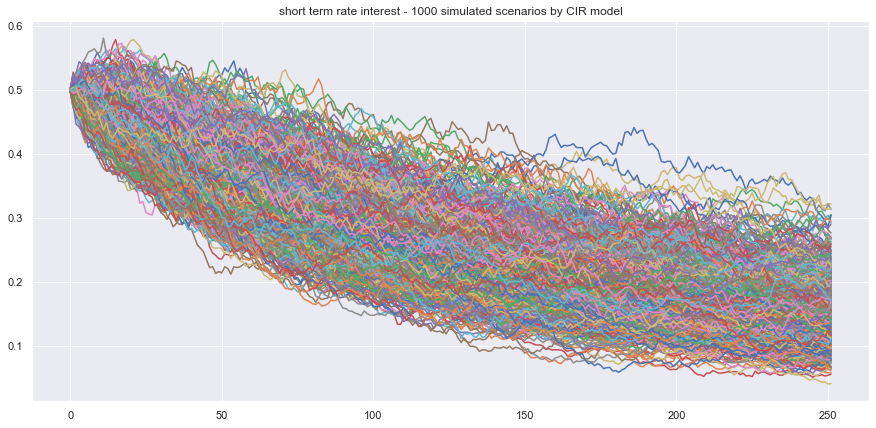

In [86]:
cir_simulation.plot(figsize=(15,7), legend=False, title='short term rate interest - 1000 simulated scenarios by CIR model')

In [87]:
mean_rates_per_period_cir = cir_simulation.mean(axis='columns') #r.mean(axis=1)

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [89]:
def simulate_table(mean_rates_per_period_cir):
    N=252
    df = pd.DataFrame()
    y = np.zeros(N)
    x1 = np.zeros(N)
    x2 = np.zeros(N)
    dt=1/252
    for i in range(1,N):
        df['rt'] = mean_rates_per_period_cir
        y[i] = (mean_rates_per_period_cir[i]-mean_rates_per_period_cir[i-1])/np.sqrt(mean_rates_per_period_cir[i-1])
        df['y'] = y
        x1[i] =dt/np.sqrt(mean_rates_per_period_cir[i-1])
        df['x1'] = x1
        x2[i] = np.sqrt(mean_rates_per_period_cir[i-1])*dt
        df['x2'] = x2
    
    return df

In [90]:
df = simulate_table(cir_simulation[0])

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
X = df[['x1','x2']]
y = df['y']
reg = LinearRegression().fit(X, y)

In [92]:
model1 = sm.OLS(y, X).fit()
dt=1/252
sigma= (model1.ssr)/(len(df)*dt)
sigma

0.04222468801111956

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation.columns),3))
param_names = ['a','b','sigma']
for i in range(0,len(cir_simulation.columns)):
    data = simulate_table(cir_simulation[i])
    X = data[['x1','x2']]
    y = data['y']
    model = sm.regression.linear_model.OLS(y, X)
    results = model.fit()
    param_fits[i,0] = -results.params[1]
    param_fits[i,1] = results.params[0]/param_fits[i,0]
        
    model1 = sm.OLS(y, X).fit()
    dt=1/252
    param_fits[i,2] = np.sqrt((model1.ssr)/(len(data)*dt))

        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)



In [94]:
param_fits

,a,b,sigma
0,3.584116,0.129819,0.205486
1,2.272085,0.105824,0.195450
2,0.788536,-0.098844,0.189774
3,2.587095,0.125875,0.204063
4,2.370416,0.234767,0.182688
...,...,...,...
995,6.389423,0.202548,0.201770
996,2.125735,0.132039,0.192019
997,1.531653,0.073981,0.189142
998,7.499204,0.351956,0.198149


In [95]:
param_fits.describe()

,a,b,sigma
count,1000.000000,1000.000000,1000.000000
mean,2.660529,0.148310,0.197637
std,1.330531,3.222108,0.008987
min,-0.950507,-49.727058,0.172467
25%,1.800292,0.072404,0.191765
50%,2.507716,0.121049,0.197920
75%,3.390264,0.164355,0.203438
max,10.027968,88.563703,0.225930


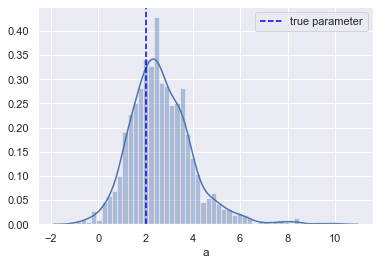

In [100]:
d1 = sns.distplot(param_fits.loc[:,'a'], bins=50)
plt.axvline(2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


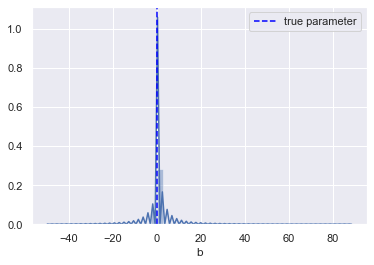

In [101]:
d2 = sns.distplot(param_fits.loc[:,'b'])
plt.axvline(0.1, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()


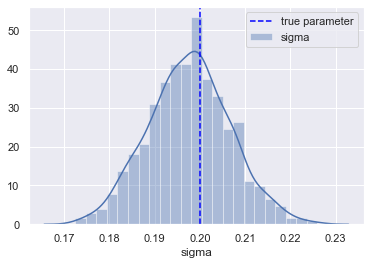

In [99]:
d3 = sns.distplot(param_fits.loc[:,'sigma'], label = 'sigma')
plt.axvline(0.2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()
d3